##  Exploring Age, Gender, and Health Conditions as Predictors of Mortality in Heart Failure Patients

### Table of Contents
1. Project Overview**# 
1.1 Introduction*# *
1.1.1 Problem Statement# **
1.2 Objectives**
2. Importing Packages**
3. Loading Data**
4. Data Cleaning**
5. Exploratory Data Analysing 
10. Conclusion**
11. References

### Project Overview

### Introduction

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, with heart failure being a major contributor. Understanding the factors that influence mortality in heart failure patients—particularly age, gender, and pre-existing conditions like hypertension and diabetes—can help in identifying high-risk individuals and improving patient outcomes.

This project explores the relationships between demographic factors and health conditions in predicting mortality among heart failure patients. Using a dataset with 12 key variables from 299 patients, $we aim to develop a machine learning model that can assess mortality risk, providing insights that could support healthcare providers in early intervention and personalized treatment strategies$ (remove the sentence between the dollars sign)

### Problem statement 

Heart failure, a common outcome of cardiovascular disease, presents a significant mortality risk globally. Early identification of patients at high risk can support proactive healthcare and reduce mortality. This project explores the influence of age, gender, and coexisting health conditions on mortality in heart failure patients, aiming to provide actionable insights for improved patient management

### Objectives

1. To analyze how age and gender impact the prevalence of health conditions (e.g., diabetes, hypertension, anemia) in  heart failure patients.
2. To assess mortality risk across different demographic groups and health conditions.

### Importing Packages 

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings


warnings.filterwarnings("ignore")

### Loading data

In [71]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv("C:\\Users\\lebog\\Documents\\unisa 2024\\STA4813\\archive (1)\\heart_failure_clinical_records_dataset.csv")
#df= pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


creatinine_phosphokinase - level of enzymes in the blood

ejection_fraction - Percentage of blood leaving the heart at each contraction 

platelets - platelets in the blood

serum_creatinine - Level of serum creatinine in the blood 

serum_sodium - level of sodium in the blood 

time - follow-up period(days)

Death event - If the patient deceased during the follow-up period (boolean), where 0 - Non-death and 1 Death

Anaemia - patients with anaemia represented by 1 and patients without anaemia represented by 0 

Diabetes - patients with diabetes represented by 1 and patients without diabetes represented by 0 

High blood pressure - patients with high blood pressure represented by 1 and patients without high blood pressure represented by 0 

Smoking - Non-smokers - 0 and Smokers - 1

Sex - 0 Males and 1 females 

In [72]:
df.shape

(299, 13)

import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df .info()

### Data Cleaning 

In [73]:
# Round the ages to the nearest whole number
df['age'] = df['age'].round().astype(int)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [74]:
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

## Checking for null or empty entries in the data frame

In [75]:
# Check for null (NaN) values in each column
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [76]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.836120,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


For anaemia, diabetes, high_blood_pressure, smoking, DEATH_EVENT, looking at the mean, we realised that the columns that yield binary result, they provide us with the probability of the event occuring. 

## unique values and their counts in the DEATH_EVENT column

In [77]:
print("Unique entries in the DEATH_EVENT column:")
print(df['DEATH_EVENT'].value_counts())
#show the number of death events, where 1 represents the death has occured and 0 represent not death has occurred, 
#looking if there is an extra or null entries

Unique entries in the DEATH_EVENT column:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [78]:
print("Unique entries in the anaemia column:")
print(df['anaemia'].value_counts())

Unique entries in the anaemia column:
anaemia
0    170
1    129
Name: count, dtype: int64


# The minimum and maximum time of duration on follow-ups 

In [79]:
#print("Minimum value in the time column:", df['time'].min())
#print("Maximum value in the time column:", df['time'].max())
#to be removed on github, Lebo 

In [80]:
from scipy.stats import pearsonr
from lifelines import KaplanMeierFitter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Correlation analysis

In [81]:
print("\nCorrelation Matrix:")
df.corr()


Correlation Matrix:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088222,-0.081672,-0.100791,0.060049,0.093347,-0.052294,0.159161,-0.045992,0.065371,0.018539,-0.223969,0.253800
anaemia,0.088222,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081672,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.100791,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060049,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093347,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052294,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159161,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045992,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065371,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [82]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Univariate analysis

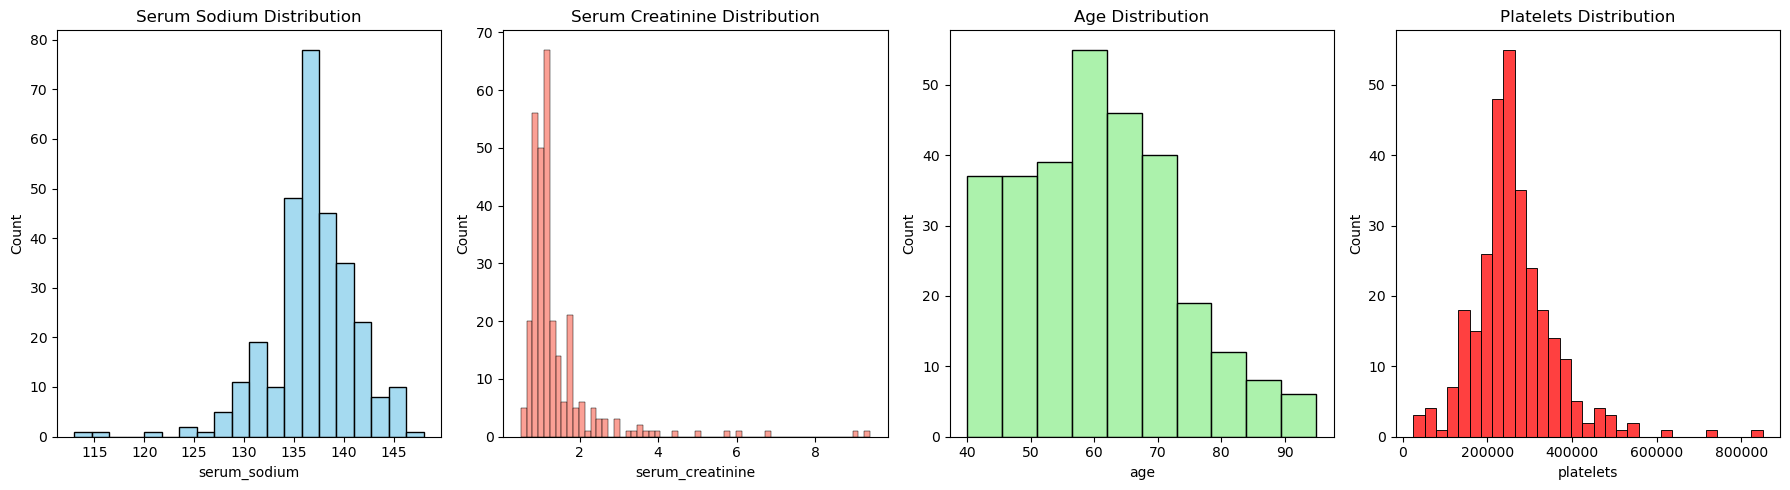

In [83]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot histograms on each subplot
sns.histplot(df['serum_sodium'], ax=axes[0], color="skyblue")
axes[0].set_title('Serum Sodium Distribution')

sns.histplot(df['serum_creatinine'], ax=axes[1], color="salmon")
axes[1].set_title('Serum Creatinine Distribution')

sns.histplot(df['age'], ax=axes[2], color="lightgreen")
axes[2].set_title('Age Distribution')

sns.histplot(df['platelets'], ax=axes[3], color="red")
axes[3].set_title('Platelets Distribution')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Showing the distribution for none are normally distributed
The serum sodium is right skewed, where most observations are in the range 135 to 140. The serum creatinine is left skewed, there is a right long tail, resulting in more possible outliers. The age is have more observations between 50 to 70, telling us the people between the ages 50 to 70 are at more risk to death, the death influenced by sickness like high blood pressure and diabetes. 
We further look at the relation between age and platelets. 

# Violin plot comparison of age by DEATH_EVENT

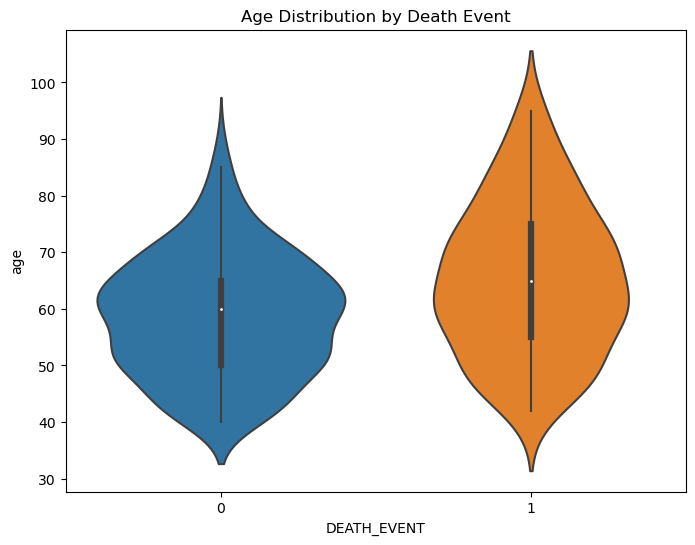

In [84]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age Distribution by Death Event')
plt.show()

We have discovered that 0 represents non-death and 1 represents death, looking at the violin plot, the mean of death is significantly higher than mean of the non-death, showing the average age of the patients die is between the ages of 60 to 80 that is similar to patients not dying. To verify the accurately of this plot, the maximum of of patient die is between 90 to 100, which is realistic. Further discussing the 75 percentile of patients dying is high. These results can be influenced by the various diseases attached to this dataset. 

## Visualize the correlation matrix

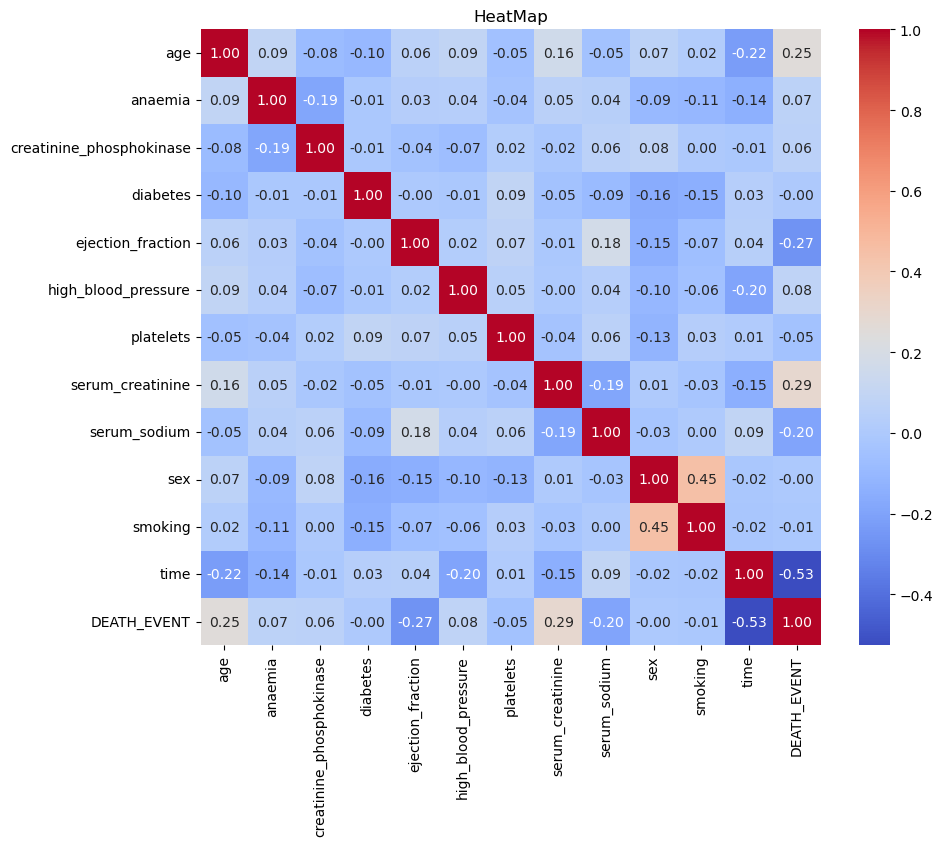

In [85]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('HeatMap')
plt.show()

In the heatmap, it represents the correlation matrix of the variables.
Features like high_blood_pressure, anaemia, creatinine_phosphokinase, diabetes, sex, smoking, and platelets do not display any kind of correlation with DEATH_EVENT. 

The feature time and death has a negative lower correlation of -0.53, explaining that as one increases, the other tends to decrease to a moderate extent.

From this result, this does not support our objective that diseases do not influence death  

# Group survival analysis by 'high_blood_pressure' 0= Not diabetic, 1= Diabetic

In [86]:
#I think this can be represent in a bargraph and can be removed. 
#plt.figure(figsize=(8, 6))
#for label, grouped_df in df.groupby('high_blood_pressure'):
 #   kmf.fit(grouped_df['time'], event_observed=grouped_df['DEATH_EVENT'], label=f"High BP: {label}")
 #   kmf.plot_survival_function()
#plt.title('Survival Curve by High Blood Pressure')
#plt.xlabel('Time (days)')
#plt.ylabel('Survival Probability')
#plt.legend()
#plt.show()

Pariplot to see relationships between the variables

# Risk Factor Analysis with Multivariate Plot

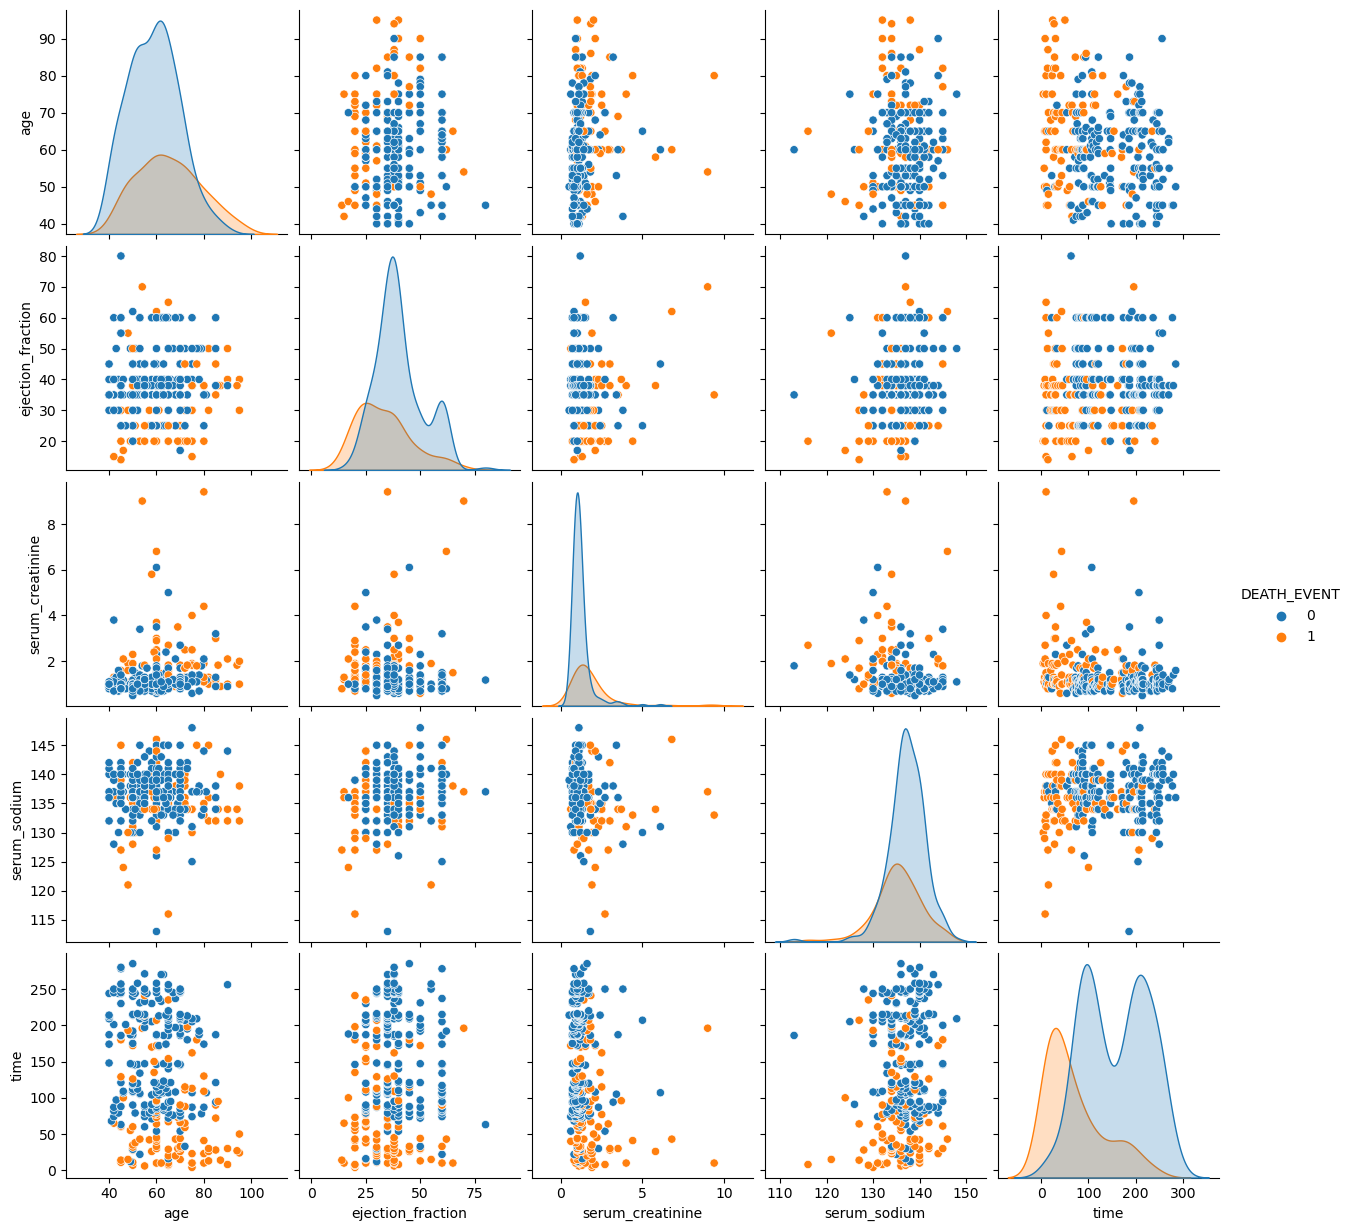

In [87]:
sns.pairplot(df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']], hue='DEATH_EVENT')
plt.show()


In the pairplot, we visualise the correlation matrix. We can see from pairplot, the scattorplots do not show a relation between variables, just as we saw in the heatmap, very low correlations. 

## Checking the relationship between 

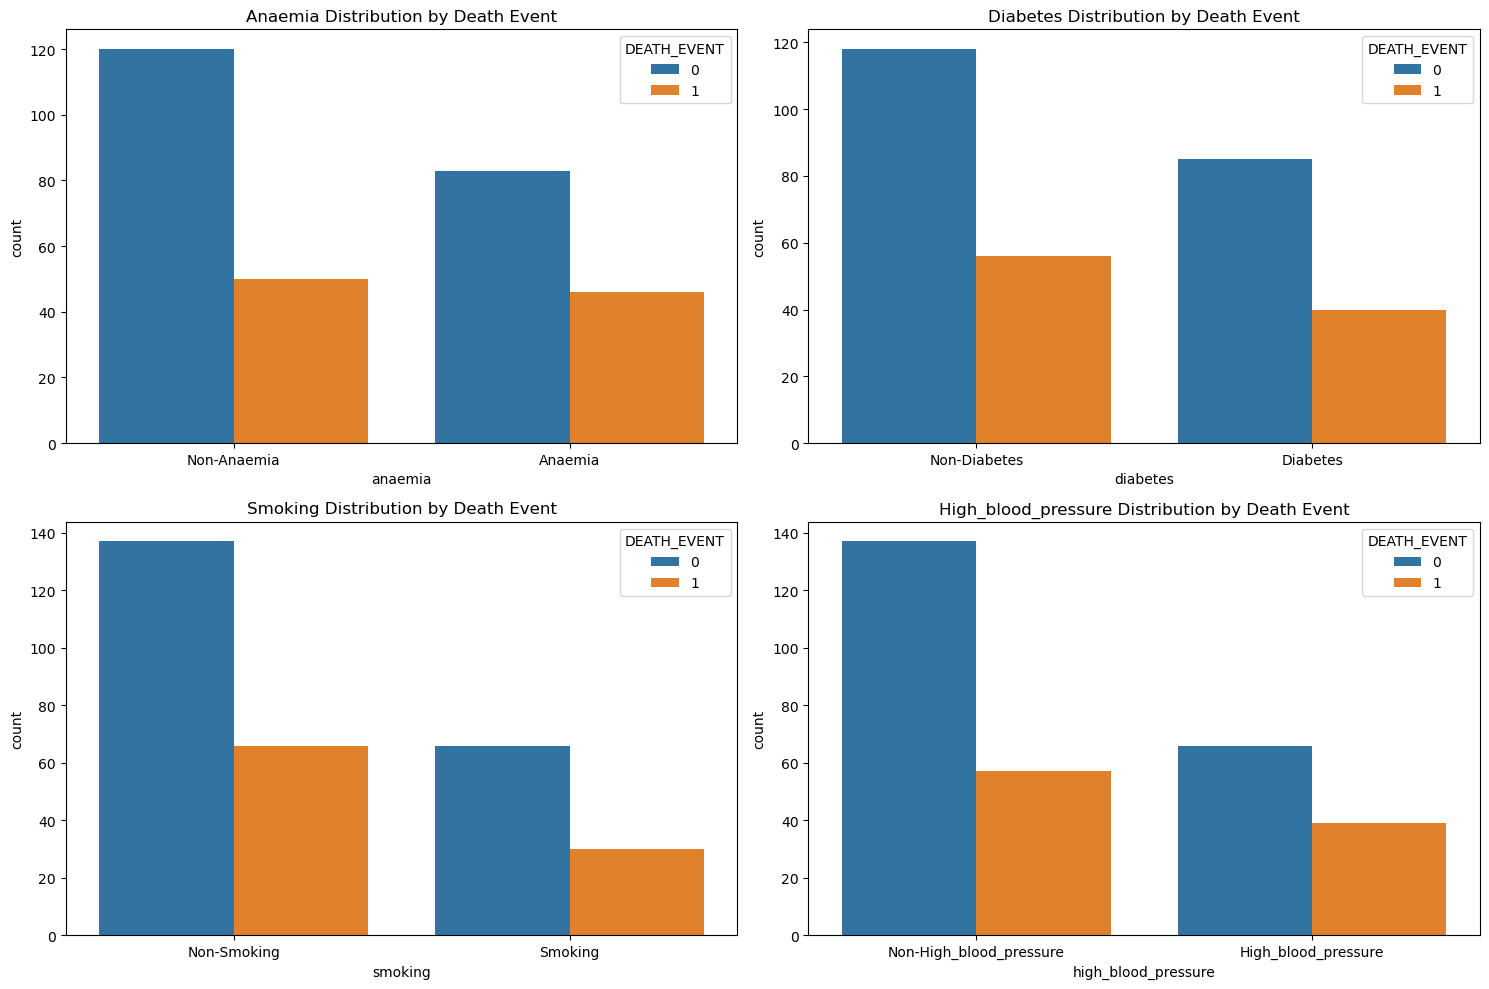

In [88]:
# Count plot for 'anaemia', 'diabetes', 'smoking', 'high_blood_pressure'
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = ['anaemia', 'diabetes', 'smoking', 'high_blood_pressure']

# Mappings for labels
label_map = {0: 'Non-', 1: ''}  # Prefix map for 'No' vs. regular label

# Set up the plot
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='DEATH_EVENT', data=df)
    plt.title(f'{var.capitalize()} Distribution by Death Event')
    
    # Update x-axis labels based on 0/1 values
    plt.xticks([0, 1], [f'{label_map[val]}{var.capitalize()}' for val in [0, 1]])

plt.tight_layout()
plt.show()


We also plotted the boolean columns in bar graphs. All the graphs exhibit a similar trend. Based on the graphs, patients without (0) anaemia , diabetes, high blood pressure, and smoking have a higher likelihood of experiencing a DEATH_EVENT compared to those with positive cases of these conditions. Additionally, the male population has a higher incidence of DEATH_EVENT due to heart failure than the female population.

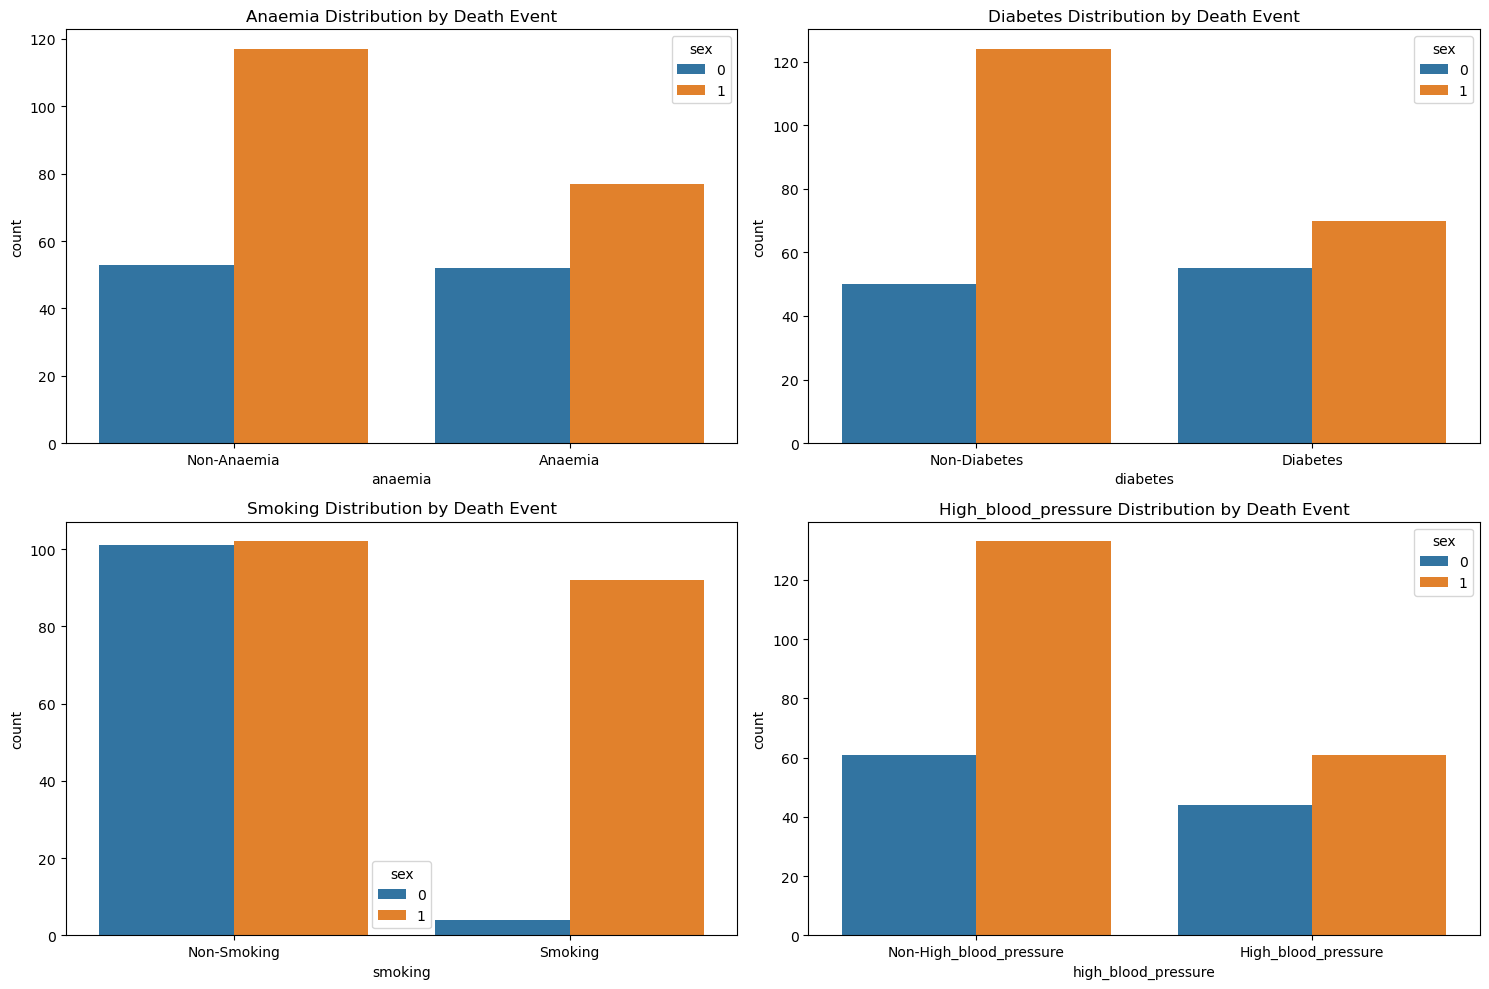

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = ['anaemia', 'diabetes', 'smoking', 'high_blood_pressure']

# Mappings for labels
label_map = {0: 'Non-', 1: ''}  # Prefix map for 'No' vs. regular label

# Set up the plot
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='sex', data=df)
    plt.title(f'{var.capitalize()} Distribution by Death Event')
    
    # Update x-axis labels based on 0/1 values
    plt.xticks([0, 1], [f'{label_map[val]}{var.capitalize()}' for val in [0, 1]])

plt.tight_layout()
plt.show()


# Hypothesis

<b>Relationship between death and smoking</b>

Null Hypothesis: 
$$
H_0: \rho = 0
$$
Alternate Hypothesis:
$$
H_1: \rho \neq 0
$$

In [63]:
from scipy.stats import pearsonr
corr_coef, p_val = pearsonr(df['smoking'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', p_val)

the Pear correlation coefficient: -0.012623152709359636
the pvalue: 0.82792071280924


By the results, we do not reject the null hypothesis since the pvalue = 0.828 > 0.05, therefore is no correlation between death and smoking. This makes sense because by the dataset we are given, it is based on heart diseases which smoking does not highly affect heart failure. 



<b>Relationship between death and high blood pressure </b>

Null Hypothesis: 
$$
H_0: \rho = 0
$$
Alternate Hypothesis:
$$
H_1: \rho \neq 0
$$

In [64]:
corr_coef, p_val = pearsonr(df['high_blood_pressure'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', p_val)

the Pear correlation coefficient: 0.07935105769128536
the pvalue: 0.17114949852935257


In [53]:
# gender/sex vs smoking
# ejection fraction vs death event
# platelets vs anaemia
# age vs high blood pressure
# gender vs high blood pressure 
# sex vs death event

In [69]:
corr_coef, p_val = pearsonr(df['ejection_fraction'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', p_val)

the Pear correlation coefficient: -0.2686033123940619
the pvalue: 2.4528974182087856e-06


By the results, we do reject the null hypothesis since the pvalue = 2.4529e-06 < 0.05, therefore is a correlation between ejection fraction and death event. This makes sense because by the dataset we are given, it is based on heart diseases, ejection fraction relates to blood flow in the heart. On assumption, a low ejection fraction leads to a low heart rate that leads to an death event 

In [96]:
from scipy import stats

diabetic = df[df['diabetes'] == 1]['age']
non_diabetic = df[df['diabetes'] == 0]['age']

# Perform a t-test
t_stat, p_val = stats.ttest_ind(diabetic, non_diabetic)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age between diabetic and non-diabetic patients.")
else:
    print("Fail to reject the null hypothesis: No significant difference in age between diabetic and non-diabetic patients.")


T-statistic: -1.746
P-value: 0.082
Fail to reject the null hypothesis: No significant difference in age between diabetic and non-diabetic patients.


In [66]:
corr_coef, p_val = pearsonr(df['age'], df['high_blood_pressure'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))

the Pear correlation coefficient: 0.09328868460631874
the pvalue: 0.107427


In [67]:
corr_coef, p_val = pearsonr(df['sex'], df['high_blood_pressure'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))

the Pear correlation coefficient: -0.10461462935689742
the pvalue: 0.070865


In [92]:
corr_coef, p_val = pearsonr(df['anaemia'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))

the Pear correlation coefficient: 0.06627009846028781
the pvalue: 0.253299


Patients with anaemia are more likely to experience death in heart failure."

Reasoning: Anaemia can worsen the condition of heart failure by decreasing oxygen delivery, which may increase the risk of death.
However, in this test, we do not reject hypothesis, since the p value > 0.05

In [98]:
survived = df[df['DEATH_EVENT'] == 0]['age']
died = df[df['DEATH_EVENT'] == 1]['age']

# Perform a t-test to compare the means
t_stat, p_val = stats.ttest_ind(survived, died)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age between survivors and those who died.")
else:
    print("Fail to reject the null hypothesis: No significant difference in age between survivors and those who died.")


T-statistic: -4.522
P-value: 8.86297502252399e-06
Reject the null hypothesis: There is a significant difference in age between survivors and those who died.


Age is positively correlated with the likelihood of death in heart failure patients. Reject the null hypothesis.Reasoning: Older age may be a risk factor in heart failure, with an increased likelihood of death as age increases.

In [93]:
corr_coef, p_val = pearsonr(df['creatinine_phosphokinase'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))

the Pear correlation coefficient: 0.06272816025237474
the pvalue: 0.279611


In [99]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


Methodology



Cleaning data: 
-checked the structure of the dataset using shape
-changed the age to whole numbers using round function and astype(init) 
-We used isnull for check null entries or non-zeros entries for each column 
-describe() helps you get a quick overview of your data's key statistics, making it easier to analyze and identify patterns or issues, this in return provides us with the probabilities for the binary variables. 

EDA: 
-first used the corr() to get the correlation matrix, to understand the relation between variables 
-started with the univariate analysis, plotting the histogram for continuous variables. we import import seaborn as sns to use sns.histplot to plot histograms. Each histogram helps in understanding the frequency or distribution of the data points in each variable, which can reveal insights such as:
Whether the data is normally distributed or skewed.
The presence of any outliers.
The spread of values within the variable.

-For violin plot: plt.subplots(2, 2, figsize=(15, 10)): Creates a 2x2 grid of subplots and sets the figure size.
sns.histplot: Used to create histograms for each variable.
tight_layout(): Automatically adjusts subplot parameters to give some padding between plots and avoid overlap of labels and titles.
plt.show(): Displays the figure with all the histograms.

-Correlation matrix plot: The code uses seaborn's pairplot to visualize relationships between multiple numeric variables (age, ejection_fraction, serum_creatinine, serum_sodium, time) and how they relate to the DEATH_EVENT (death or no death). The pairplot shows scatterplots for each pair of variables and histograms for individual variables, color-coded by DEATH_EVENT. This helps in identifying correlations, distributions, and potential patterns in the data, especially how the variables differ between those who survived and those who did not. The plt.show() function displays the plot.

-barplot:The code uses seaborn's countplot to visualize the distribution of categorical variables (anaemia, diabetes, smoking, high_blood_pressure) by DEATH_EVENT. It creates a separate plot for each variable, showing how the categories are distributed between those who survived (0) and those who died (1). The plots are organized in a 2x2 grid, and plt.tight_layout() ensures proper spacing. This helps in understanding the relationship between each condition and the death outcome.

Under the hypothesis: 
We did not use the pearsonr test because Pearson's r measures the strength of the relationship between two continuous variables. For example, it checks if age and another number (like serum creatinine) are strongly related. But it doesn't work well when one of the variables is binary (like DEATH_EVENT), so it's not the best choice here.
whereas the t-test is used to compare the average (mean) of a continuous variable (like age) between two groups. 
How does the t-test work?
The t-test looks at the average age in each group for explain the death  event, survived and died.
It checks if the difference between the two averages is big enough to say it’s statistically significant or if it just happened by chance.

So the difference is t-test we use it when you want to compare the average of a continuous variable (like age) between two groups like in the death event (survived vs died).
Pearson's r: Use it when both variables are continuous (like age and serum_sodium).
In our dataset, t-test is the right choice to see if there is a significant difference in a continuous variable between a binary variable.

<h1> Conclusion



Summary of Key Findings:
•	When setting out on this project analysis, the initial thought of the team was that the data would support, what we thought to be general knowledge: That being sick with other illnesses and/or engaging in activities detrimental to your health, such as smoking would significantly impact chances of one dying heart failure. The story that this data tells quickly disproved that theory. In our research we found that:
•	There is little to no correlation between being pre-diagnosed with illnesses such as, Anaemia, Hypertension (High Blood Pressure), Diabetes and Hypernatremia (High Sodium levels) and experiencing the death event, caused by heart failure.
•	There is however a relatively significant relationship between age and acquiring these illnesses as well as age the death event itself occurring.
Implications of the Findings:
Looking at the results of this study, significant insights could be provided to various sectors in order to decrease the number of people dying from heart failure, as well as to provide better services to ill patients.
Below are two examples:
•	Insurance policies companies could use the information/results provided to tailor-make and improve the insurance package models offered to their ill patients.  
•	Doctors and biomedical-engineers could divert their resources and attention to conducting studies on older patients with heart-related issues in order to come up with new medical technologies that assist in early intervention and personalized treatment strategies

Reflection on the Data Source and Quality: 
•	We were fortunate enough to find a high quality dataset that was from a fairly reputable data source. The data had a vast variety, that satisfied the purpose of the project.
